In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
EXPORT_PLOTS = False
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,2,3,True,2010-06-15,D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work,32,0.088235
1,5,14,True,2010-01-07,chandra,believe me year try many many different hand c...,Best hand cream ever.,34,0.388889
2,5,0,True,2018-04-18,Maureen G,great hand lotion,Five Stars,1,0.000000
3,5,0,True,2018-04-18,Terry K,best severely dry skin hand,Five Stars,1,0.000000
4,5,0,True,2018-04-17,Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.,1,0.000000
...,...,...,...,...,...,...,...,...,...
591494,5,0,True,2013-02-22,Tiffany M.,come time described far work perfectly gamecub...,works on Gamecube,22,0.000000
591495,5,0,True,2013-02-22,Ian,get tire rebeat mario kart double dash wii get...,"cheap, does the job",22,0.000000
591496,5,14,True,2013-02-20,Alex Harker,product excellent ton gamecube game inexpensiv...,Inexpensive and Effective,22,0.583333
591497,5,0,True,2013-02-08,Cristina Hardwick,arrive way schedule work great need issue woul...,excellent,22,0.000000


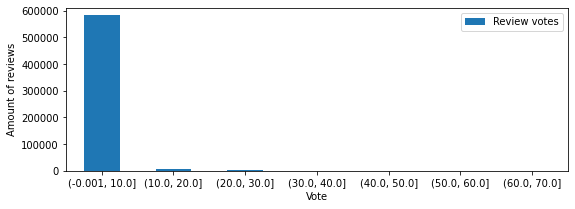

In [3]:
bins = list(range(0, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_including_0.pdf", bbox_inches="tight")

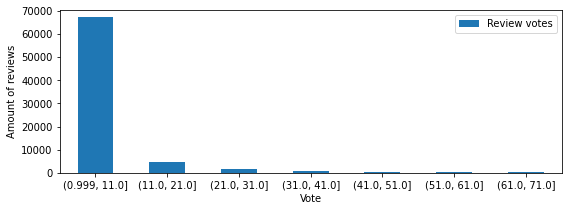

In [4]:
bins = list(range(1, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_excluding_0.pdf", bbox_inches="tight")

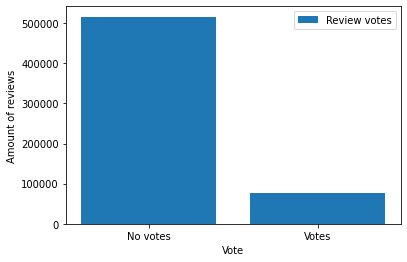

In [5]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/no_votes_vs_votes.pdf", bbox_inches="tight")

In [6]:
bins = list(range(1, 75, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[37255, 2483, 827, 307, 165, 116, 72],
 [8685, 559, 183, 78, 43, 36, 22],
 [5770, 429, 173, 84, 36, 21, 11],
 [4402, 356, 120, 60, 43, 12, 11],
 [10994, 967, 333, 145, 86, 75, 55]]

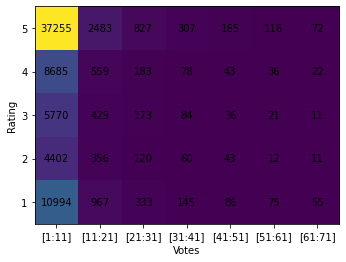

In [7]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Votes")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

if EXPORT_PLOTS:
    plt.savefig("../../report/img/rating_vote_heatmap_excluding_no_votes.pdf")